

```
Обучение свёрточной нейронной сети

Работа выполняется в Google colab notebook;

Обучить модель MobileNetV2 во фреймворке PyTorch классифицировать датасет FashionMNIST.
Обратите внимание, что скачивать датасет и тащить код из непонятных репозиториев не нужно. PyTorch всё скачает за вас.

Важно:
При сдаче лабораторной я открою исходный код сети MobileNetV2 и буду спрашивать как работает каждый слой. Нужно знать как работают все слои (хотя бы поверхностно).

Вопросы, на которые заранее нужно нагуглить ответ:
1) Чем отличается DWS свёртка от обычной?
2) Что делает слой пулинг?
3) Зачем нужна активация?
4) График функции ReLU?
5) Зачем в сети слой BatchNorm?```



In [ ]:
import torch 
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision
from torchvision.transforms import ToTensor
from skimage import transform
import torchvision.transforms as transforms
from torch.autograd import Variable
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
import random
import math
import matplotlib.pyplot as plt
import cv2



num_epochs = 3
batch_size = 100
learning_rate = 0.001

train_dataset = torchvision.datasets.FashionMNIST(root="dataset/",
                                                  train=True,
                                                  download=True,
                                                  transform=ToTensor())
test_dataset = torchvision.datasets.FashionMNIST(root="dataset/",
                                                  train=False,
                                                  download=True,
                                                  transform=ToTensor())

train_loader = torch.utils.data.DataLoader(train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)



def permutor(img):
    output = []
    for i in img:
        image = cv2.cvtColor(np.array(i[0]), cv2.COLOR_GRAY2RGB) #converts a single channel image to multichannel by replicating.
        output.append(image)
    output = torch.Tensor(output).permute(0, 3, 1, 2)
    return output



model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=False)
model.train()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)




  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting dataset/FashionMNIST/raw/train-images-idx3-ubyte.gz to dataset/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting dataset/FashionMNIST/raw/train-labels-idx1-ubyte.gz to dataset/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting dataset/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to dataset/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting dataset/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/FashionMNIST/raw



Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /root/.cache/torch/hub/v0.10.0.zip


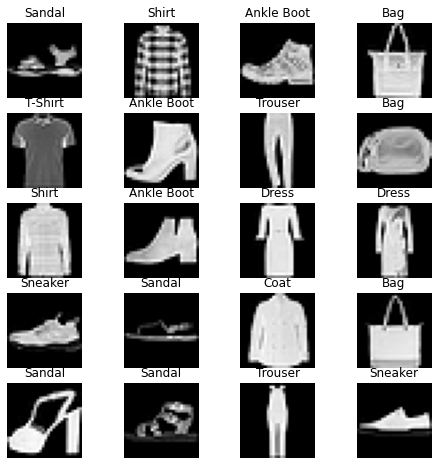

In [ ]:
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'}

fig = plt.figure(figsize=(8,8))
columns = 4
rows = 5

for i in range(1, columns*rows +1):
    img_xy = np.random.randint(len(train_dataset))
    img = train_dataset[img_xy][0][0,:,:]
    fig.add_subplot(rows, columns, i)
    plt.title(labels_map[train_dataset[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
model.train()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

losses = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = permutor(images)
        images = Variable(images.float())
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = model(images) ### err, permute to change shape?
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item());
        
        if (i+1) % 100 == 0:
            print ('Epoch : %d/%d, Iter : %d/%d,  Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.item()))
            


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)


Epoch : 1/3, Iter : 100/600,  Loss: 0.9736
Epoch : 1/3, Iter : 200/600,  Loss: 0.5170
Epoch : 1/3, Iter : 300/600,  Loss: 0.5623
Epoch : 1/3, Iter : 400/600,  Loss: 0.5932
Epoch : 1/3, Iter : 500/600,  Loss: 0.6108
Epoch : 1/3, Iter : 600/600,  Loss: 0.4639
Epoch : 2/3, Iter : 100/600,  Loss: 0.4145
Epoch : 2/3, Iter : 200/600,  Loss: 0.3965
Epoch : 2/3, Iter : 300/600,  Loss: 0.3756
Epoch : 2/3, Iter : 400/600,  Loss: 0.5147
Epoch : 2/3, Iter : 500/600,  Loss: 0.3064
Epoch : 2/3, Iter : 600/600,  Loss: 0.4994
Epoch : 3/3, Iter : 100/600,  Loss: 0.2694
Epoch : 3/3, Iter : 200/600,  Loss: 0.3777
Epoch : 3/3, Iter : 300/600,  Loss: 0.3375
Epoch : 3/3, Iter : 400/600,  Loss: 0.3858
Epoch : 3/3, Iter : 500/600,  Loss: 0.2580
Epoch : 3/3, Iter : 600/600,  Loss: 0.3140


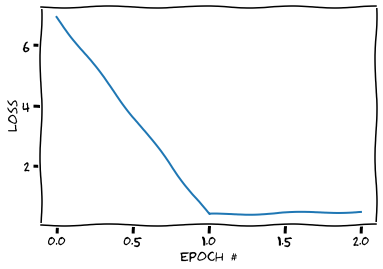

In [ ]:
losses_in_epochs = losses[0::600]
plt.xkcd()
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.plot(losses_in_epochs)
plt.show()

In [ ]:
model.eval()
correct = 0
total = 0
for images, labels in test_loader:
    images2 = images
    images = permutor(images)
    images = Variable(images.float())
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    print('Test Accuracy of the model on the test images: %.4f %%' % (100 * correct / total))
print('Test Accuracy of the model on the test images: %.4f %%' % (100 * correct / total))

Test Accuracy of the model on the test images: 85.0000 %
Test Accuracy of the model on the test images: 87.0000 %
Test Accuracy of the model on the test images: 86.0000 %
Test Accuracy of the model on the test images: 86.5000 %
Test Accuracy of the model on the test images: 87.2000 %
Test Accuracy of the model on the test images: 87.5000 %
Test Accuracy of the model on the test images: 87.8571 %
Test Accuracy of the model on the test images: 87.3750 %
Test Accuracy of the model on the test images: 87.5556 %
Test Accuracy of the model on the test images: 87.2000 %
Test Accuracy of the model on the test images: 87.0909 %
Test Accuracy of the model on the test images: 86.7500 %
Test Accuracy of the model on the test images: 86.5385 %
Test Accuracy of the model on the test images: 86.1429 %
Test Accuracy of the model on the test images: 85.9333 %
Test Accuracy of the model on the test images: 85.6250 %
Test Accuracy of the model on the test images: 85.3529 %
Test Accuracy of the model on t

In [ ]:
torch.save(model.state_dict(), "kek")